![Image Description](../images/course_logo_2025.png)

# Ex 2: Data Wrangling, Cleaning and Enhancing

![Image Description](../images/ds_cycle.png)


# Data Source

[Real Estate New York](https://www.kaggle.com/datasets/manishpatil009/real-estate-in-new-york?resource=download)

This is a dataset about the properties in New York City.
The data was **scraped** from Trulia Website with the help of selenium Webdriver. This dataset contains the Name of the property, the city where the property belongs, the Neighborhood, the Price of the Property in USD, the year the property was built in, the beds, baths , Area per Square Feet and the status Air Conditioning. **No Geographic Coordinates.**

[MapPluto](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page)

Extensive land use and geographic data at the tax lot level in comma-separated values (CSV) file format. The PLUTO files contain more than seventy fields derived from data maintained by city agencies. **Used for Geographic reference**
![Image Description](../images/MapPluto_lots.png)



In [145]:
# Loading the libraries
from fuzzywuzzy import process
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm



In [146]:
# Loading Real Estate data
real_estate_df = pd.read_csv('https://raw.githubusercontent.com/Shai2u/gis_ml_workshop_winter_2024_2025/refs/heads/Ex_2/Ex_2/real_estate_nyc.csv')

In [147]:
real_estate_df.head()

,Unnamed: 0,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only
1,1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only
2,2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only
3,3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only
4,4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No


In [148]:
# Remove Unnamed: 0
real_estate_df = pd.read_csv('https://raw.githubusercontent.com/Shai2u/gis_ml_workshop_winter_2024_2025/refs/heads/Ex_2/Ex_2/real_estate_nyc.csv', index_col=0)

In [149]:
real_estate_df.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No


In [150]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 386
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             387 non-null    object
 1   City             387 non-null    object
 2   Neighbourhood    387 non-null    object
 3   Price            387 non-null    object
 4   Year Built       387 non-null    object
 5   Beds             387 non-null    object
 6   Baths            387 non-null    object
 7   Area             387 non-null    object
 8   Price(per sqft)  387 non-null    object
 9   A/C              387 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


# 🧐

In [151]:
real_estate_df['Name'].value_counts()

Name
3324 Junction Blvd #5X            10
117 E 57th St #41F                10
150 E 69th St #3M                 10
2415 E 64th St                    10
410 Maryland Ave #1C              10
140 E 2nd St #6U                  10
195 Classon Ave #5                10
43 Joralemon St                   10
37-26 32nd St #5K                 10
1619 3rd Ave #3B                  10
99-12 199th Street                10
6243 79th St                      10
661 Amsterdam Ave #5E             10
433 Monroe St                     10
2339 Matthews Ave #W              10
97-40 62nd Dr #8F                 10
2736 Independence Ave #6J         10
137-08 31st Rd #2                 10
37-26 32nd St #3G                 10
37-26 32nd St #6L                 10
4 E 88th St #5C                   10
37-26 32nd St #3H                 10
216-02 67th Ave #D                10
450 Jersey St                     10
1518 Canarsie Rd                  10
77-14 113th Street UNIT 3C        10
86-19 115th Street               

In [152]:
len(real_estate_df)

387

In [153]:
len(real_estate_df.drop_duplicates())

41

In [154]:
real_estate_df = real_estate_df.drop_duplicates().reset_index(drop=True)

In [155]:
len(real_estate_df)

41

In [156]:
real_estate_df['Name'].value_counts()

Name
150 E 69th St #3M                 2
3324 Junction Blvd #5X            1
37-26 32nd St #5K                 1
195 Classon Ave #5                1
140 E 2nd St #6U                  1
410 Maryland Ave #1C              1
2415 E 64th St                    1
321 E 43rd St #515                1
150-23 Hoover Avenue              1
3656 Johnson Ave #2G              1
180-16 Wexford Terrace UNIT 2F    1
43-55 Kissena Blvd UNIT 3B        1
580 Carroll St #4C                1
398 Kings Hwy #203                1
377 Rector Pl #11A                1
3112 Mickle Avenue                1
35-42 77th St #22                 1
1247 E 86th Street                1
11 Quinn St                       1
43 Joralemon St                   1
2339 Matthews Ave #W              1
1619 3rd Ave #3B                  1
1518 Canarsie Rd                  1
37-26 32nd St #3G                 1
37-26 32nd St #6L                 1
37-26 32nd St #3H                 1
4 E 88th St #5C                   1
2736 Independence Ave #

In [157]:
real_estate_df.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No


In [158]:
real_estate_df['Address'] = real_estate_df['Name'].str.split('#').str[0]
real_estate_df['Apartment'] = real_estate_df['Name'].str.split('#').str[1]

In [159]:
real_estate_df.head()

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment
0,3324 Junction Blvd #5X,"Jackson Heights, NY 11372",Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H


In [160]:
real_estate_df['City'].value_counts()

City
Long Island City, NY 11101    4
Jackson Heights, NY 11372     2
Jamaica, NY 11432             2
New York, NY 10128            2
Bronx, NY 10463               2
Brooklyn, NY 11236            2
New York, NY 10065            2
Staten Island, NY 10305       1
Brooklyn, NY 11234            1
New York, NY 10017            1
Brooklyn, NY 11215            1
Flushing, NY 11355            1
Brooklyn, NY 11205            1
Brooklyn, NY 11223            1
New York, NY 10280            1
Bronx, NY 10469               1
Staten Island, NY 10304       1
Brooklyn, NY 11218            1
Bronx, NY 10467               1
Brooklyn, NY 11201            1
Hollis, NY 11423              1
Flushing, NY 11379            1
New York, NY 10025            1
Brooklyn, NY 11221            1
New York, NY 10022            1
Rego Park, NY 11374           1
Flushing, NY 11354            1
Richmond Hill, NY 11418       1
Forest Hills, NY 11375        1
Staten Island, NY 10301       1
Oakland Gardens, NY 11364     1
Sta

In [161]:
real_estate_df['City_short'] = real_estate_df['City'].str.split(', NY ').str[0]

In [162]:
real_estate_df['postal_code'] = real_estate_df['City'].str.split(', NY ').str[1].astype(int)

In [163]:
real_estate_df['state']  = 'NY'

In [164]:
real_estate_df['City_short'].value_counts()

City_short
Brooklyn            9
New York            8
Long Island City    4
Bronx               4
Staten Island       4
Flushing            3
Jackson Heights     2
Jamaica             2
Oakland Gardens     1
Forest Hills        1
Richmond Hill       1
Rego Park           1
Hollis              1
Name: count, dtype: int64

In [165]:
real_estate_df.drop(columns=['City'], inplace=True)

In [166]:
real_estate_df.head()

,Name,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state
0,3324 Junction Blvd #5X,Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY
1,37-26 32nd St #5K,Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY
2,37-26 32nd St #3G,Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY
3,37-26 32nd St #6L,Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY
4,37-26 32nd St #3H,Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY


In [167]:
real_estate_df['Neighbourhood'].value_counts()

Neighbourhood
Astoria               4
Upper East Side       3
Canarsie              2
Bedford Stuyvesant    2
Flushing              2
Jackson Heights       2
New Brighton          1
Forest Hills          1
Stapleton             1
Baychester            1
Battery Park          1
Gravesend             1
Park Slope            1
Jamaica Estates       1
Riverdale             1
Briarwood             1
Turtle Bay            1
Mill Basin            1
Rosebank              1
Windsor Terrace       1
Brooklyn Heights      1
Williamsbridge        1
Carnegie Hill         1
Hollis                1
Middle Village        1
Upper West Side       1
Spuyten Duyvil        1
Midtown               1
Rego Park             1
Oakland Gardens       1
Richmond Hill         1
Heartland Village     1
Name: count, dtype: int64

In [168]:
real_estate_df.head()

,Name,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state
0,3324 Junction Blvd #5X,Jackson Heights,"$285,000",Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY
1,37-26 32nd St #5K,Astoria,"$620,000",Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY
2,37-26 32nd St #3G,Astoria,"$730,000",Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY
3,37-26 32nd St #6L,Astoria,"$570,000",Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY
4,37-26 32nd St #3H,Astoria,"$695,000",Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY


In [169]:
real_estate_df['Price_'] = real_estate_df['Price'].str.replace('$', '').str.replace(',', '').astype(int)

<Axes: xlabel='Price_', ylabel='Count'>

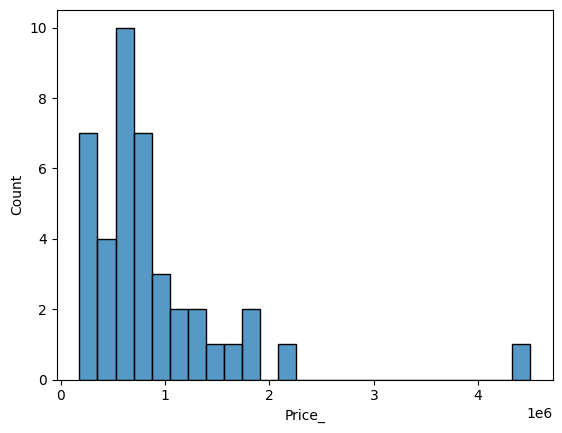

In [170]:
sns.histplot(real_estate_df['Price_'], bins=25)

<Axes: ylabel='Price_'>

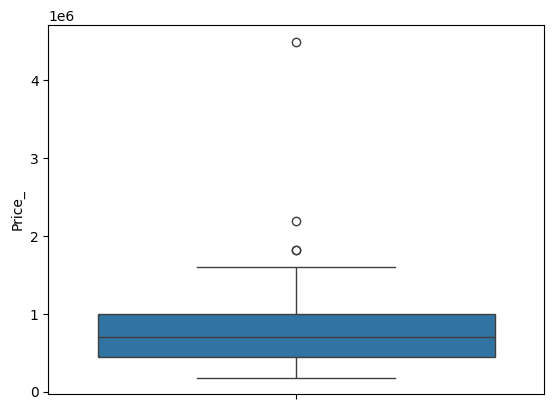

In [171]:
sns.boxplot(y='Price_', data=real_estate_df)

In [172]:
real_estate_df['Price_'].describe()

count    4.100000e+01
mean     8.856850e+05
std      7.452819e+05
min      1.790000e+05
25%      4.500000e+05
50%      6.950000e+05
75%      9.999000e+05
max      4.500000e+06
Name: Price_, dtype: float64

In [173]:
real_estate_df.drop(columns=['Price'], inplace=True)

In [174]:
real_estate_df['Year Built'].value_counts()

Year Built
Year Built: 2022    5
Year Built: 1940    3
Year Built: 1975    3
Null                2
Year Built: 1959    2
Year Built: 1950    2
Year Built: 1899    2
Year Built: 1955    2
Year Built: 1938    2
Year Built: 1920    2
Year Built: 1986    1
Year Built: 2009    1
Year Built: 1985    1
Year Built: 1921    1
Year Built: 1932    1
Year Built: 1945    1
Year Built: 1928    1
Year Built: 1845    1
Year Built: 1965    1
Year Built: 1974    1
Year Built: 2008    1
Year Built: 2007    1
Year Built: 1910    1
Year Built: 1970    1
Year Built: 1922    1
Year Built: 1915    1
Name: count, dtype: int64

In [175]:
sum(real_estate_df['Year Built'] == 'Null')

2

In [176]:
real_estate_df['Year Built int'] = real_estate_df['Year Built'].str.split('Year Built:').str[1].astype(float)


In [177]:
real_estate_df.head()


,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0


In [178]:
real_estate_df['Year Built int'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [179]:
real_estate_df['Year Built int'].value_counts()

Year Built int
2022.0    5
1975.0    3
1940.0    3
1959.0    2
1920.0    2
1938.0    2
1955.0    2
1899.0    2
1950.0    2
1921.0    1
1985.0    1
2009.0    1
1986.0    1
1932.0    1
1945.0    1
1928.0    1
1845.0    1
1965.0    1
1974.0    1
2008.0    1
1922.0    1
2007.0    1
1910.0    1
1970.0    1
1915.0    1
Name: count, dtype: int64

In [180]:
real_estate_df['Year Built int'].describe()

count      39.000000
mean     1956.897436
std        40.996017
min      1845.000000
25%      1930.000000
50%      1955.000000
75%      1980.000000
max      2022.000000
Name: Year Built int, dtype: float64

<Axes: ylabel='Year Built int'>

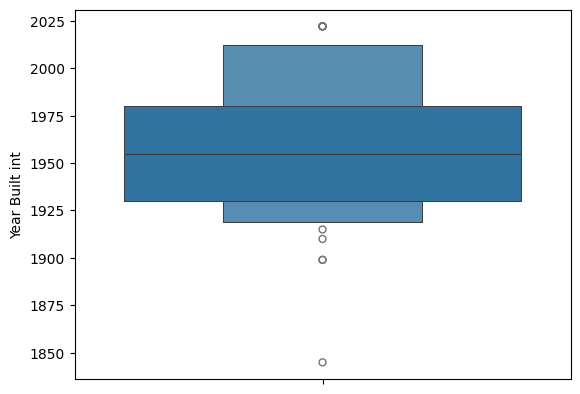

In [181]:
sns.boxenplot(y='Year Built int', data=real_estate_df)

In [182]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0


In [183]:
real_estate_df['Beds'].value_counts()

Beds
2 Beds    14
1 Bed     11
Studio     6
5 Beds     3
4 Beds     3
3 Beds     2
6 Beds     1
7 Beds     1
Name: count, dtype: int64

In [184]:
real_estate_df['Beds'] == 'Studio'

0     False
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
Name: Beds, dtype: bool

In [185]:
real_estate_df.loc[real_estate_df['Beds'] == 'Studio', 'Studio'] = True

In [186]:
real_estate_df.loc[:,'Studio'].fillna(False, inplace=True)

/var/folders/pl/dfcs60nn16qdw7bltcc09p3h0000gn/T/ipykernel_7342/1110933445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  real_estate_df.loc[:,'Studio'].fillna(False, inplace=True)
/var/folders/pl/dfcs60nn16qdw7bltcc09p3h0000gn/T/ipykernel_7342/1110933445.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [187]:
real_estate_df['Bed_rooms'] = 1

In [188]:
real_estate_df.loc[real_estate_df['Studio'] == False, 'Beds'].head()

0     1 Bed
2     1 Bed
4     1 Bed
5    2 Beds
6     1 Bed
Name: Beds, dtype: object

In [189]:
real_estate_df.loc[real_estate_df['Studio'] == False, 'Bed_rooms'] = real_estate_df.loc[real_estate_df['Studio'] == False, 'Beds'].str.split(' ').str.get(0).astype(int)

In [190]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1 Bath,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1 Bath,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1 Bath,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1 Bath,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1 Bath,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1


In [191]:
real_estate_df['Baths'].value_counts()

Baths
1 Bath     17
2 Baths    17
4 Baths     3
3 Baths     2
5 Baths     1
6 Baths     1
Name: count, dtype: int64

In [192]:
real_estate_df['Baths'] = real_estate_df['Baths'].str.split(' ').str.get(0).astype(int)

In [193]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800 sqft,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441 sqft,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579 sqft,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429 sqft,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632 sqft,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1


In [194]:
real_estate_df['Area'].value_counts()

Area
Null                            14
800 sqft                         2
1,100 sqft                       2
528 sqft                         1
916 sqft                         1
1,180 sqft                       1
650 sqft                         1
1,140 sqft                       1
1,275 sqft                       1
764 sqft                         1
1,899 sqft                       1
1,185 sqft                       1
3,192 sqft                       1
880 sqft                         1
441 sqft                         1
100,964 sqft (on 0.46 acres)     1
2,400 sqft                       1
513 sqft                         1
842 sqft                         1
1,816 sqft                       1
6,300 sqft                       1
850 sqft                         1
632 sqft                         1
429 sqft                         1
579 sqft                         1
934 sqft                         1
Name: count, dtype: int64

In [195]:
real_estate_df['Area'] = real_estate_df['Area'].str.split(' sqft').str.get(0).str.replace(',', '').replace('Null', np.nan).astype(float)

In [196]:
real_estate_df['Area']

0        800.0
1        441.0
2        579.0
3        429.0
4        632.0
5          NaN
6        850.0
7          NaN
8       6300.0
9       1816.0
10         NaN
11         NaN
12       842.0
13         NaN
14       513.0
15      2400.0
16    100964.0
17       880.0
18         NaN
19       528.0
20         NaN
21      3192.0
22      1185.0
23         NaN
24      1100.0
25      1899.0
26         NaN
27         NaN
28         NaN
29       800.0
30       764.0
31         NaN
32      1275.0
33      1140.0
34       650.0
35      1180.0
36      1100.0
37         NaN
38       916.0
39       934.0
40         NaN
Name: Area, dtype: float64

In [197]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579.0,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429.0,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632.0,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1


In [198]:
real_estate_df['price_per_sqft'] = real_estate_df['Price_'] / real_estate_df['Area']

In [199]:
real_estate_df[['Price(per sqft)', 'price_per_sqft']].drop_duplicates()

,Price(per sqft),price_per_sqft
0,$356,356.250000
1,"$1,406",1405.895692
2,"$1,261",1260.794473
3,"$1,329",1328.671329
4,"$1,100",1099.683544
5,No Info,NaN
6,$278,277.641176
8,$206,206.349206
9,$509,509.361233
12,$746,745.843230


In [200]:
real_estate_df['price_per_sqft'] = real_estate_df['price_per_sqft'].apply(lambda p: np.round(p, 0))

Text(0, 0.5, 'Area')

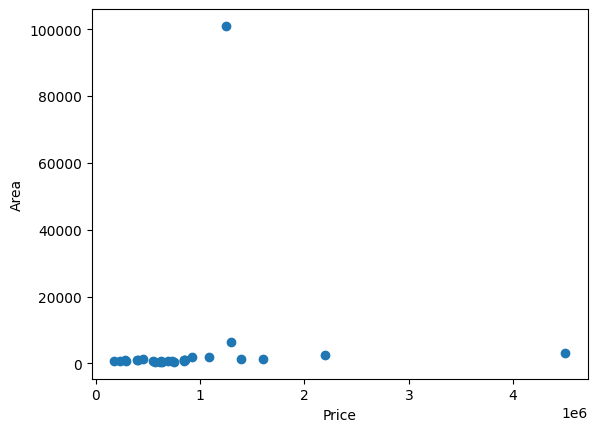

In [201]:
plt.plot(real_estate_df['Price_'], real_estate_df['Area'], 'o')
plt.xlabel('Price')
plt.ylabel('Area')

In [202]:
real_estate_df[['Price_','Area']]

,Price_,Area
0,285000,800.0
1,620000,441.0
2,730000,579.0
3,570000,429.0
4,695000,632.0
5,1200000,NaN
6,235995,850.0
7,388000,NaN
8,1300000,6300.0
9,925000,1816.0


In [203]:
price_area = real_estate_df[['Price_','Area']].dropna()

In [204]:
price_area['Area'].sort_values().values

array([   429.,    441.,    513.,    528.,    579.,    632.,    650.,
          764.,    800.,    800.,    842.,    850.,    880.,    916.,
          934.,   1100.,   1100.,   1140.,   1180.,   1185.,   1275.,
         1816.,   1899.,   2400.,   3192.,   6300., 100964.])

Text(0, 0.5, 'Area')

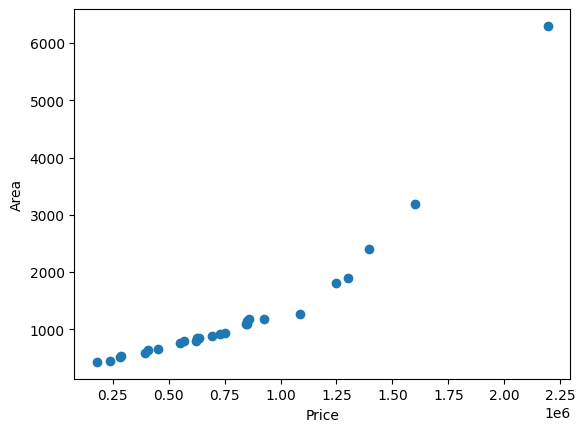

In [205]:
plt.plot(price_area['Price_'].sort_values().values[0:-1], price_area['Area'].sort_values().values[0:-1], 'o')
plt.xlabel('Price')
plt.ylabel('Area')

In [206]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,Price(per sqft),A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms,price_per_sqft
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,$356,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1,356.0
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,"$1,406",Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1,1406.0
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579.0,"$1,261",Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1,1261.0
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429.0,"$1,329",Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1,1329.0
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632.0,"$1,100",No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1,1100.0


In [207]:
real_estate_df.drop(columns='Price(per sqft)', inplace=True)

In [208]:
real_estate_df['A/C'].value_counts()

A/C
No                   15
Heating & Cooling    11
Cooling only          9
Heating only          6
Name: count, dtype: int64

In [210]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            41 non-null     object 
 1   Neighbourhood   41 non-null     object 
 2   Year Built      41 non-null     object 
 3   Beds            41 non-null     object 
 4   Baths           41 non-null     int64  
 5   Area            27 non-null     float64
 6   A/C             41 non-null     object 
 7   Address         41 non-null     object 
 8   Apartment       26 non-null     object 
 9   City_short      41 non-null     object 
 10  postal_code     41 non-null     int64  
 11  state           41 non-null     object 
 12  Price_          41 non-null     int64  
 13  Year Built int  39 non-null     float64
 14  Studio          41 non-null     bool   
 15  Bed_rooms       41 non-null     int64  
 16  price_per_sqft  27 non-null     float64
dtypes: bool(1), float64(3), int64(4), obj

# Fuzzy Logic/ Geolocation

In [211]:
# Load Tax Data
mapPluto_df = pd.read_csv('https://raw.githubusercontent.com/Shai2u/gis_ml_workshop_winter_2024_2025/refs/heads/Ex_2/Ex_2/mapPluto_sample.csv', index_col=0)

In [212]:
mapPluto_df.head()

,Borough,Address,Latitude,Longitude
0,MN,377 RECTOR PLACE,40.709851,-74.017891
1,MN,54 STANTON ST EXTENSION,40.704283,-74.010120
2,MN,62 AVE C,40.722504,-73.979678
3,MN,661 AMSTERDAM AVENUE,40.791681,-73.971690
4,BX,2339 MATTHEWS AVENUE,40.860773,-73.863017


In [213]:
print(f"MapPluto: {len(mapPluto_df)}, RealEstate: {len(real_estate_df)}")

MapPluto: 7534, RealEstate: 41


In [214]:
mapPluto_df['Borough'].value_counts()

Borough
QN    1513
BK    1509
MN    1504
BX    1504
SI    1504
Name: count, dtype: int64

In [215]:
mapPluto_df.head()

,Borough,Address,Latitude,Longitude
0,MN,377 RECTOR PLACE,40.709851,-74.017891
1,MN,54 STANTON ST EXTENSION,40.704283,-74.010120
2,MN,62 AVE C,40.722504,-73.979678
3,MN,661 AMSTERDAM AVENUE,40.791681,-73.971690
4,BX,2339 MATTHEWS AVENUE,40.860773,-73.863017


In [216]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms,price_per_sqft
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1,356.0
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1,1406.0
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579.0,Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1,1261.0
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429.0,Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1,1329.0
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632.0,No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1,1100.0


In [217]:
mapPluto_df['Address'].isin(real_estate_df['Address'].unique()).sum()

0

In [218]:
match, score = process.extractOne('3324 Junction Blvd', mapPluto_df['Address'].unique())

In [219]:
print(f"match: {match}, score: {score}")

match: 33-43 JUNCTION BLVD, score: 92


In [220]:
def get_best_match(addr_df, choices):
    match, score = process.extractOne(addr_df, choices)
    return match if score > 80 else np.nan

In [221]:
addresses = mapPluto_df['Address'].unique().tolist()

In [222]:
len(addresses)

7518

In [223]:
print(addresses[0:10])

['377 RECTOR PLACE', '54 STANTON ST EXTENSION', '62 AVE C', '661 AMSTERDAM AVENUE', '2339 MATTHEWS AVENUE', '3112 MICKLE AVENUE', '2973 INDEPENDENCE AVENUE', '3656 JOHNSON AVENUE', '140 LAWRENCE STREET', '43 JORALEMON STREET']


In [226]:
mapPluto_df['Address'][0:20].apply(lambda addr: get_best_match(addr, addresses))

0             377 RECTOR PLACE
1      54 STANTON ST EXTENSION
2                     62 AVE C
3         661 AMSTERDAM AVENUE
4         2339 MATTHEWS AVENUE
5           3112 MICKLE AVENUE
6     2973 INDEPENDENCE AVENUE
7          3656 JOHNSON AVENUE
8          140 LAWRENCE STREET
9          43 JORALEMON STREET
10          580 CARROLL STREET
11       1285A ST MARKS AVENUE
12           433 MONROE STREET
13          195 CLASSON AVENUE
14              1247 86 STREET
15              51-24 2 STREET
16      45-40 VERNON BOULEVARD
17      46-42 VERNON BOULEVARD
18              5-43 48 AVENUE
19        10-37 JACKSON AVENUE
Name: Address, dtype: object

## 😣 This takes too much time! ⌛️
lets try to reduce the process of time and make the model run faster

In [227]:
mapPluto_df.head()

,Borough,Address,Latitude,Longitude
0,MN,377 RECTOR PLACE,40.709851,-74.017891
1,MN,54 STANTON ST EXTENSION,40.704283,-74.010120
2,MN,62 AVE C,40.722504,-73.979678
3,MN,661 AMSTERDAM AVENUE,40.791681,-73.971690
4,BX,2339 MATTHEWS AVENUE,40.860773,-73.863017


In [228]:
print(real_estate_df['City_short'].unique(), mapPluto_df['Borough'].unique())

['Jackson Heights' 'Long Island City' 'New York' 'Bronx' 'Oakland Gardens'
 'Staten Island' 'Brooklyn' 'Forest Hills' 'Richmond Hill' 'Flushing'
 'Rego Park' 'Hollis' 'Jamaica'] ['MN' 'BX' 'BK' 'QN' 'SI']


In [229]:
city_to_borough = {'Jackson Heights' :'QN',
'Long Island City': 'QN',
'New York': 'MN',
'Bronx': 'BX',
'Oakland Gardens': 'QN',
'Staten Island': 'SI',
'Brooklyn' : 'BK',
'Forest Hills': 'QN',
'Richmond Hill': 'QN',
'Flushing':'QN',
'Rego Park':'QN',
'Hollis':'QN', 
'Jamaica':'QN'}

In [230]:
real_estate_df['Borough'] = real_estate_df['City_short'].apply(city_to_borough.get)

In [231]:
real_estate_df.head(2)

,Name,Neighbourhood,Year Built,Beds,Baths,Area,A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms,price_per_sqft,Borough
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1,356.0,QN
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1,1406.0,QN


In [232]:
def get_best_match(addr_df, choices):
    borough = addr_df['Borough']
    addr = addr_df['Address']
    choices_subset = choices[choices['Borough']== borough]['Address'].tolist()
    match, score = process.extractOne(addr, choices_subset)
    return match if score > 80 else np.nan

tqdm.pandas()
df_03 = real_estate_df.iloc[0:].copy()


In [233]:
real_estate_df['Matched Address'] = real_estate_df.progress_apply(
    lambda p: get_best_match(p, mapPluto_df), axis=1)

100%|██████████| 41/41 [00:01<00:00, 40.98it/s]


In [234]:
real_estate_df.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,A/C,Address,Apartment,City_short,postal_code,state,Price_,Year Built int,Studio,Bed_rooms,price_per_sqft,Borough,Matched Address
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,Cooling only,3324 Junction Blvd,5X,Jackson Heights,11372,NY,285000,NaN,False,1,356.0,QN,33-43 JUNCTION BLVD
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,Cooling only,37-26 32nd St,5K,Long Island City,11101,NY,620000,2022.0,True,1,1406.0,QN,10-37 JACKSON AVENUE
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579.0,Cooling only,37-26 32nd St,3G,Long Island City,11101,NY,730000,2022.0,False,1,1261.0,QN,10-37 JACKSON AVENUE
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429.0,Cooling only,37-26 32nd St,6L,Long Island City,11101,NY,570000,2022.0,True,1,1329.0,QN,10-37 JACKSON AVENUE
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632.0,No,37-26 32nd St,3H,Long Island City,11101,NY,695000,2022.0,False,1,1100.0,QN,10-37 JACKSON AVENUE


In [235]:
real_estate_lat_long = real_estate_df.merge(mapPluto_df.drop(columns=['Borough']), left_on='Matched Address', right_on='Address', how='left', suffixes=['','_'])

In [236]:
real_estate_lat_long.head()

,Name,Neighbourhood,Year Built,Beds,Baths,Area,A/C,Address,Apartment,City_short,...,Price_,Year Built int,Studio,Bed_rooms,price_per_sqft,Borough,Matched Address,Address_,Latitude,Longitude
0,3324 Junction Blvd #5X,Jackson Heights,Null,1 Bed,1,800.0,Cooling only,3324 Junction Blvd,5X,Jackson Heights,...,285000,NaN,False,1,356.0,QN,33-43 JUNCTION BLVD,33-43 JUNCTION BLVD,40.755650,-73.872658
1,37-26 32nd St #5K,Astoria,Year Built: 2022,Studio,1,441.0,Cooling only,37-26 32nd St,5K,Long Island City,...,620000,2022.0,True,1,1406.0,QN,10-37 JACKSON AVENUE,10-37 JACKSON AVENUE,40.742443,-73.953256
2,37-26 32nd St #3G,Astoria,Year Built: 2022,1 Bed,1,579.0,Cooling only,37-26 32nd St,3G,Long Island City,...,730000,2022.0,False,1,1261.0,QN,10-37 JACKSON AVENUE,10-37 JACKSON AVENUE,40.742443,-73.953256
3,37-26 32nd St #6L,Astoria,Year Built: 2022,Studio,1,429.0,Cooling only,37-26 32nd St,6L,Long Island City,...,570000,2022.0,True,1,1329.0,QN,10-37 JACKSON AVENUE,10-37 JACKSON AVENUE,40.742443,-73.953256
4,37-26 32nd St #3H,Astoria,Year Built: 2022,1 Bed,1,632.0,No,37-26 32nd St,3H,Long Island City,...,695000,2022.0,False,1,1100.0,QN,10-37 JACKSON AVENUE,10-37 JACKSON AVENUE,40.742443,-73.953256


# Plot Geographicly

In [237]:
real_estate_gdf = gpd.GeoDataFrame(real_estate_lat_long, crs=4326,  geometry=gpd.points_from_xy(real_estate_lat_long['Longitude'], real_estate_lat_long['Latitude']))

In [238]:
real_estate_gdf.explore(
    column='Price_',
    cmap='RdYlGn',
    legend=True,
    tiles="CartoDB positron"
)